# 图像混合

## 目标
* 图像间数学运算，如相加、按位运算等
* 函数：cv2.add()、cv2.addWeighted(),cv2.bitwise_add()

## 正文

### 图像相加
函数cv2.add(),相加的两幅图的形状一定要相同，numpy可以直接使用res=img1+img2但是两者结果是不同的。

In [1]:
import cv2
import numpy as np

x=np.uint8([255])
y=np.uint8([10])

print(cv2.add(x,y)) # 255+10=265->255
print(x+y)  # 255+10=265 %256=9,因为为8位无符号，最大整数为255，加10会溢出，只取最低8位。

[[255]]
[9]


In [2]:
x=np.uint8([25])
y=np.uint8([10])

print(cv2.add(x,y)) 
print(x+y) 

[[35]]
[35]


如果是二值化图片（只有0和255两种值），两者结果是一样的（用numpy的方式更简便一些）。

### 图像混合

函数cv2.addWeighted(),带有权重的图片相加， $\gamma$相当于一个修正量。

$$dst=\alpha \times img1 + \beta \times  img2 + \gamma$$

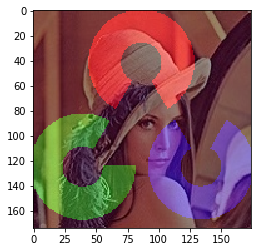

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

img1=cv2.imread('lena_small.jpg')
img2=cv2.imread('opencv-logo-white.png')

res=cv2.addWeighted(img1,0.6,img2,0.4,0)

plt.imshow(res[:,:,::-1])

### 按位操作
包括按位与/或/非/异或操作。

如果将两幅图片直接相加会改变图片的颜色，如果用图像混合，则会改变图片的透明度，所以我们需要用按位操作。首先来了解一下掩膜（mask）的概念：掩膜是用一副二值化图片对另外一幅图片进行局部的遮挡，看下图就一目了然了：

![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547704256900_ygcDsJe4OT.jpg)

实现如下所示的效果，则是先通过mask将位置抠出来，再把logo放进去。

![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547704227465_OayFUnxLaY.jpg)

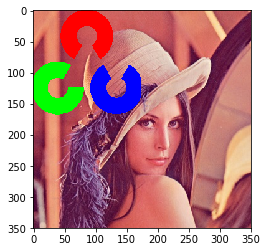

In [24]:
img1=cv2.imread('lena.jpg')
img2=cv2.imread('opencv-logo-white.png')

#把logo放在左上角，我们只关心这块区域。
rows,cols=img2.shape[:2]
roi=img1[:rows,:cols]

#创建mask
img2gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)#灰度变化
ret,mask=cv2.threshold(img2gray,10,255,cv2.THRESH_BINARY)#二值化
mask_inv=cv2.bitwise_not(mask) #取反

#保留logo外的背景
img1_bg=cv2.bitwise_and(roi,roi,mask=mask_inv) #255则保留，0则舍弃
dst=cv2.add(img1_bg,img2)
img1[:rows,:cols]=dst

plt.imshow(img1[:,:,::-1])

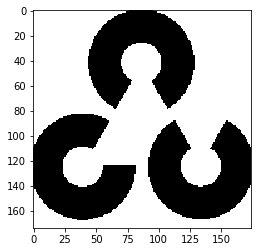

In [12]:
plt.imshow(mask_inv,cmap='gray')

## 小结
* v2.add()用来叠加两幅图片，cv2.addWeighted()也是叠加两幅图片，但两幅图片的权重不一样。
* cv2.bitwise_and(), cv2.bitwise_not(), cv2.bitwise_or(), cv2.bitwise_xor()分别执行按位与/或/非/异或运算。掩膜就是用来对图片进行全局或局部的遮挡。

In [15]:
x=np.uint8([10])
y=np.uint8([50])
print(cv2.bitwise_and(x,y))
print(cv2.bitwise_or(x,y))
print(cv2.bitwise_xor(x,y))

[[2]]
[[58]]
[[56]]


In [16]:
10&10

10

In [19]:
10 & 6

2

In [27]:
mask_inv.max(),mask_inv.min()

(255, 0)